<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/Kwandy_0706022210001_Week6_Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Mengimpor library Pandas untuk memanipulasi dan menganalisis data dalam bentuk DataFrame.
import pandas as pd
# Mengimpor library NumPy untuk melakukan komputasi numerik dan operasi pada array multidimensi.
import numpy as np
# Mengimpor modul pyplot dari Matplotlib untuk membuat visualisasi grafis seperti grafik, plot, dan diagram.
import matplotlib.pyplot as plt
# Mengimpor library Seaborn untuk membuat visualisasi data statistik yang lebih estetis dan mudah digunakan.
import seaborn as sns
# Mengimpor LabelEncoder dari scikit-learn untuk mengubah data kategorikal menjadi representasi numerik.
from sklearn.preprocessing import LabelEncoder
# Mengimpor fungsi train_test_split dari scikit-learn untuk membagi dataset menjadi set pelatihan dan pengujian.
from sklearn.model_selection import train_test_split
# Mengimpor DecisionTreeClassifier dari scikit-learn untuk membuat model klasifikasi berbasis Decision Tree.
from sklearn.tree import DecisionTreeClassifier
# Mengimpor metrik evaluasi seperti accuracy_score, confusion_matrix, dan classification_report untuk mengukur kinerja model.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Mengimpor modul tree dari scikit-learn untuk bekerja dengan model decision tree, termasuk visualisasi Tree.
from sklearn import tree
# Mengimpor Gaussian Naive Bayes dari scikit-learn untuk membangun model klasifikasi berbasis Naive Bayes dengan distribusi Gaussian.
from sklearn.naive_bayes import GaussianNB
# Mengimpor Random Forest dari scikit-learn untuk membangun model klasifikasi berbasis Random Forest.
from sklearn.ensemble import RandomForestClassifier

In [54]:
#1
# Mengambil dataset dari URL menggunakan Pandas dan membacanya sebagai DataFrame dengan pemisah koma (',').

# url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/diabetes.csv"
# url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/breast-cancer.csv"
url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/adult.csv"
df = pd.read_csv(url, delimiter=',')
# Menampilkan 10 sampel acak dari DataFrame untuk mendapatkan gambaran umum tentang data.
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
23945,23,Private,215395,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
625,43,Private,203554,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50K
14898,54,Self-emp-not-inc,224207,HS-grad,9,Widowed,Craft-repair,Not-in-family,White,Male,6849,0,50,United-States,<=50K
48697,33,Private,191335,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,50,United-States,>50K
1163,27,State-gov,301302,Doctorate,16,Married-spouse-absent,Tech-support,Not-in-family,White,Male,0,0,20,?,<=50K
24673,30,Private,97933,Assoc-acdm,12,Married-civ-spouse,Transport-moving,Wife,White,Female,0,1485,37,United-States,>50K
2548,46,Local-gov,155654,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
25231,27,Private,216481,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
10215,34,Private,303177,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,Mexico,<=50K
7925,22,Private,199555,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,48,United-States,<=50K


In [55]:
#2
# Menampilkan informasi ringkas tentang DataFrame, termasuk jumlah entri,
# jumlah non-null, tipe data tiap kolom, dan penggunaan memori.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [56]:
#3
# Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame,
# termasuk jumlah, rata-rata, standar deviasi, nilai minimum, dan persentil.
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [57]:
#4
# Menghitung jumlah kemunculan setiap spesies dalam kolom 'Income', termasuk nilai NaN (jika ada).
income_counts = df['income'].value_counts(dropna=False)

#Display Result
income_counts

,count
income,
<=50K,37155
>50K,11687


In [58]:
# Replace invalid entries (like '.') in the 'workclass' column with NaN
df['workclass'] = df['workclass'].replace('?', pd.NA)

# Impute missing 'workclass' values based on mode (most frequent value)
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

# Replace invalid entries (like '.') in the 'occupation' column with NaN
df['occupation'] = df['occupation'].replace('?', pd.NA)

# Impute missing 'occupation' values based on mode (most frequent value)
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

# Check for any remaining missing values
df_cleaned = df.isnull().sum()

# Display the result
df_cleaned

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


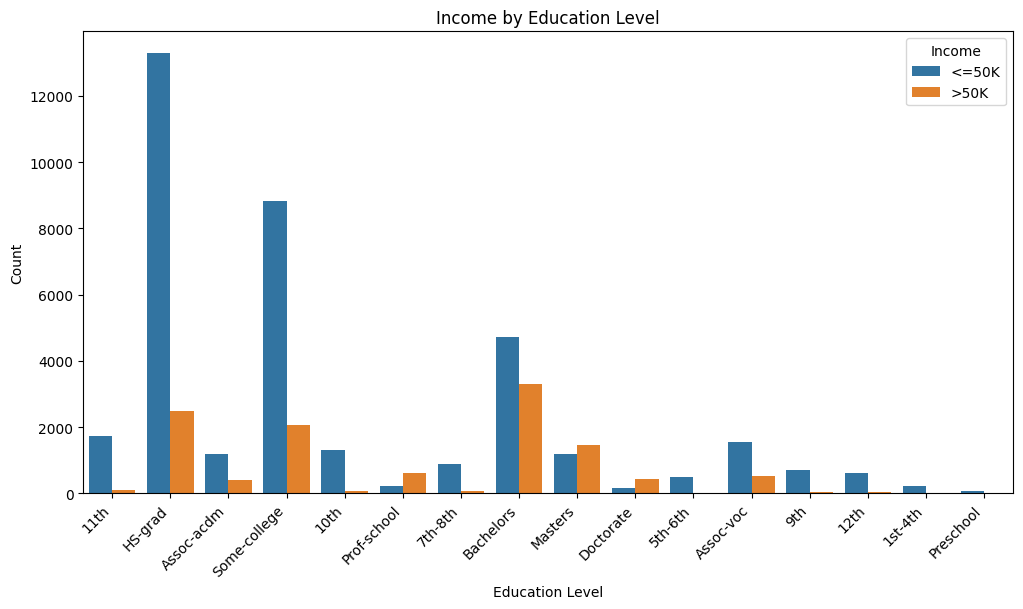

In [59]:
# 1. Income by Education Level

# Mengatur ukuran figur menggunakan plt.figure untuk memastikan plot memiliki dimensi yang sesuai (12x6).
plt.figure(figsize=(12, 6))

# Membuat plot jumlah (count plot) dengan Seaborn untuk melihat distribusi income berdasarkan tingkat pendidikan (education).
# Argumen x='education' menetapkan variabel pendidikan pada sumbu x, sedangkan hue='income' membedakan warna berdasarkan kategori income.
# Parameter data=df menetapkan sumber data yang digunakan.
sns.countplot(x='education', hue='income', data=df)

# Menyesuaikan rotasi label pada sumbu x agar label pendidikan terbaca lebih mudah, dengan sudut 45 derajat dan perataan ke kanan.
plt.xticks(rotation=45, ha='right')

# Menambahkan judul pada grafik untuk menjelaskan bahwa grafik ini menunjukkan distribusi income berdasarkan tingkat pendidikan.
plt.title('Income by Education Level')

# Menambahkan label pada sumbu x untuk menunjukkan bahwa ini adalah tingkat pendidikan (Education Level).
plt.xlabel('Education Level')

# Menambahkan label pada sumbu y untuk menunjukkan jumlah (count) dari setiap kombinasi tingkat pendidikan dan kategori income.
plt.ylabel('Count')

# Menampilkan legenda dengan judul 'Income' agar pengguna dapat memahami arti warna yang digunakan pada plot.
plt.legend(title='Income')

# Menampilkan grafik yang sudah dibuat dengan plt.show().
plt.show()


# This bar plot would show how different education levels correlate with income
# categories (<=50K and >50K). Observing the distribution of income within each
# education level can highlight whether higher educational attainment is
# associated with higher income, showing trends like people with advanced degrees
# earning more frequently above $50K.

<ipython-input-60-3cd8a9b9cd42>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y='hours-per-week', palette="Set2")


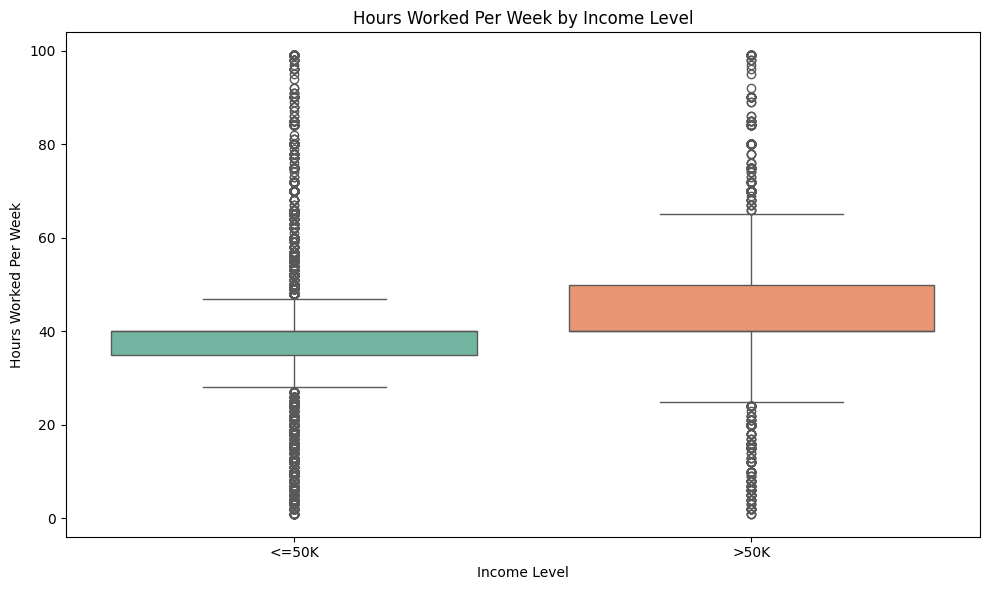

In [60]:
# 2. Hours Worked per Week by Income Level

# Mengatur ukuran figur menggunakan plt.figure untuk memastikan plot memiliki dimensi yang sesuai (10x6).
plt.figure(figsize=(10, 6))

# Membuat box plot dengan Seaborn untuk memvisualisasikan distribusi jam kerja per minggu berdasarkan tingkat pendapatan (income).
# Argumen x='income' dan y='hours-per-week' menunjukkan variabel pendapatan pada sumbu x dan jam kerja per minggu pada sumbu y.
# Parameter data=df menetapkan sumber data yang digunakan, dan palette="Set2" memberikan palet warna yang estetis untuk setiap kategori income.
sns.boxplot(data=df, x='income', y='hours-per-week', palette="Set2")

# Menambahkan judul pada grafik untuk menjelaskan bahwa grafik ini menunjukkan distribusi jam kerja per minggu berdasarkan tingkat pendapatan.
plt.title('Hours Worked Per Week by Income Level')

# Menambahkan label pada sumbu x untuk menunjukkan bahwa ini adalah tingkat pendapatan (Income Level).
plt.xlabel('Income Level')

# Menambahkan label pada sumbu y untuk menunjukkan jam kerja per minggu (Hours Worked Per Week).
plt.ylabel('Hours Worked Per Week')

# Menggunakan plt.tight_layout() untuk memastikan bahwa semua elemen pada grafik terlihat jelas dan tidak tumpang tindih.
plt.tight_layout()

# Menampilkan grafik yang sudah dibuat dengan plt.show().
plt.show()


# This box plot illustrates the weekly hours worked by individuals in each income
# category. Those earning more than 50K typically work a broader range of hours
# per week, often averaging above 40 hours, while those earning 50K or less tend
# to work closer to standard full-time hours.

In [61]:
#7
# Mengambil nilai unik dari kolom income untuk mengetahui yang terdapat dalam DataFrame.
unique_income = df['income'].unique()
# Menampilkan array income unique yang ditemukan dalam dataset.
print(unique_income)

['<=50K' '>50K']


In [62]:
#8
# Membuat objek LabelEncoder untuk mengubah data kategorikal menjadi numerik.
label_encoder = LabelEncoder()

# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['workclass'] = label_encoder.fit_transform(df['workclass'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['education'] = label_encoder.fit_transform(df['education'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['occupation'] = label_encoder.fit_transform(df['occupation'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['relationship'] = label_encoder.fit_transform(df['relationship'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['race'] = label_encoder.fit_transform(df['race'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['gender'] = label_encoder.fit_transform(df['gender'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['native-country'] = label_encoder.fit_transform(df['native-country'])
# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['income'] = label_encoder.fit_transform(df['income'])
# Menampilkan 5 sampel acak dari DataFrame setelah pengkodean.
df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
22268,37,3,385452,0,6,0,2,4,4,0,0,0,40,39,0
25539,26,6,177035,1,7,0,7,4,4,0,0,0,40,39,0
630,55,5,126840,15,10,0,6,1,4,1,0,0,40,39,0
6797,64,5,198186,12,14,4,9,1,4,0,0,0,30,0,0
5815,32,3,253890,11,9,2,2,0,4,1,0,0,40,39,0


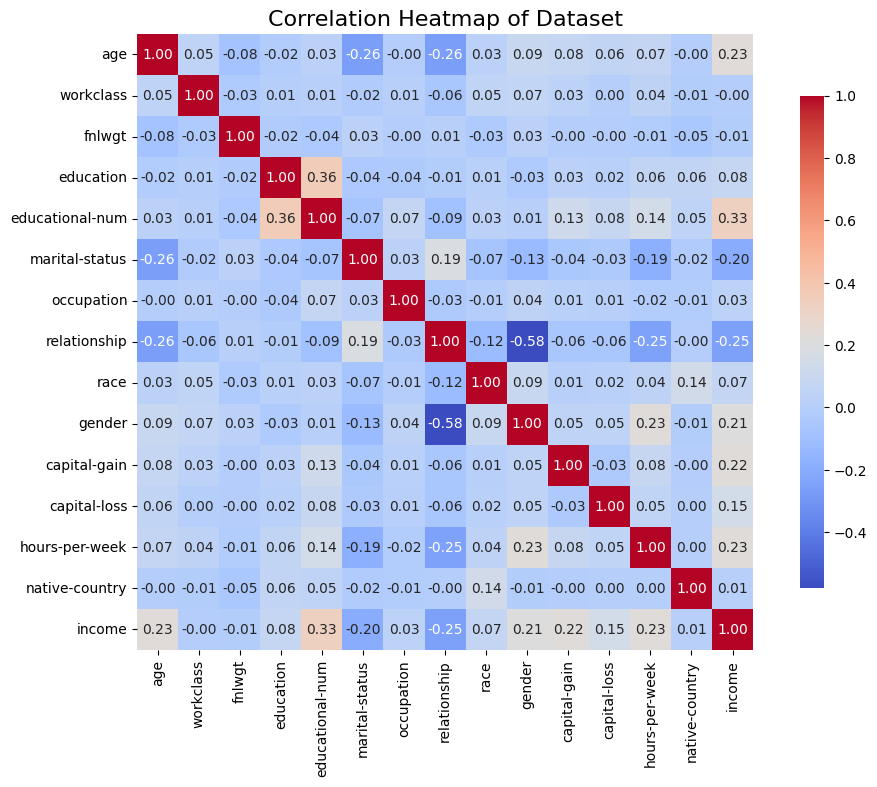

In [63]:
#10
# Menghitung matriks korelasi untuk DataFrame untuk melihat hubungan antara fitur-fitur numerik.
correlation_matrix = df.corr()

# Mengatur ukuran figure untuk visualisasi heatmap.
plt.figure(figsize=(12, 8))
# Membuat heatmap untuk matriks korelasi dengan anotasi nilai korelasi, menggunakan palet warna 'coolwarm'.
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Menambahkan judul pada heatmap.
plt.title('Correlation Heatmap of Dataset', fontsize=16)
# Menampilkan heatmap.
plt.show()

# Conclusion
# The heatmap shows correlations between various numerical features, with key
# insights focusing on income. Educational level (educational-num) has the
# strongest positive correlation with income (0.33), followed by age (0.23),
# hours-per-week (0.23), and capital-gain (0.22), suggesting these factors are
# linked to higher income. On the other hand, relationship (-0.25) and
# marital-status (-0.20) show negative correlations with income.
# Additionally, there is a strong negative correlation between relationship and
# gender (-0.58), indicating a notable inverse relationship between these variables.

In [64]:
#1
# Menghapus kolom 'income' dari DataFrame untuk membentuk fitur (X) yang akan digunakan dalam model.
X = df.drop(columns=['income'])
# Menetapkan kolom 'income' sebagai target variabel (y) yang akan diprediksi oleh model.
y = df['income']

In [65]:
#2
# Membagi dataset menjadi set pelatihan (80%) dan set pengujian (20%) dengan menggunakan fungsi train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#3
# Menampilkan dimensi dari set pelatihan (X_train) untuk mengetahui jumlah sampel dan fitur yang ada.
print(X_train.shape)
# Menampilkan dimensi dari set pengujian (X_test) untuk mengetahui jumlah sampel dan fitur yang ada.
print(X_test.shape)

(39073, 14)
(9769, 14)


Decision Tree

In [67]:
#Criterion Entropy
#a
# Membuat model Decision Tree Classifier dengan kriteria pemisahan 'entropy', kedalaman maksimum 3, dan seed acak 0.
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Melatih model menggunakan data pelatihan (X_train dan y_train).
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [68]:
#Criterion Gini
#a
# Membuat model Decision Tree Classifier dengan kriteria pemisahan 'gini', kedalaman maksimum 3, dan seed acak 0.
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Melatih model menggunakan data pelatihan (X_train dan y_train).
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [69]:
#b
# Menggunakan model Decision Tree yang dilatih untuk memprediksi kelas target pada set pengujian (X_test).
y_pred_entropy = dt_entropy.predict(X_test)

In [70]:
#b
# Menggunakan model Decision Tree yang dilatih untuk memprediksi kelas target pada set pengujian (X_test).
y_pred_gini = dt_gini.predict(X_test)

In [71]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_entropy) dengan nilai sebenarnya (y_test).
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
# Menampilkan skor akurasi model dengan format 4 desimal.
print(f"Model accuracy score with criterion entropy: {accuracy_entropy:.4f}")

Model accuracy score with criterion entropy: 0.8567


In [72]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_gini) dengan nilai sebenarnya (y_test).
accuracy_gini = accuracy_score(y_test, y_pred_gini)
# Menampilkan skor akurasi model dengan format 4 desimal.
print(f"Model accuracy score with criterion Gini Index: {accuracy_gini:.4f}")

Model accuracy score with criterion Gini Index: 0.8565


In [73]:
#d
# Menghitung skor akurasi untuk set pelatihan menggunakan model Decision Tree.
train_score_entropy = dt_entropy.score(X_train, y_train)
# Menyimpan skor akurasi untuk set pengujian dari akurasi model sebelumnya.
test_score_entropy = accuracy_entropy

# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_entropy:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_entropy:.4f}")

Training set score: 0.8508
Test set score: 0.8567


In [74]:
#d
# Menghitung skor akurasi untuk set pelatihan menggunakan model Decision Tree.
train_score_gini = dt_gini.score(X_train, y_train)
# Menyimpan skor akurasi untuk set pengujian dari akurasi model sebelumnya.
test_score_gini = accuracy_gini

# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_gini:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_gini:.4f}")

Training set score: 0.8515
Test set score: 0.8565


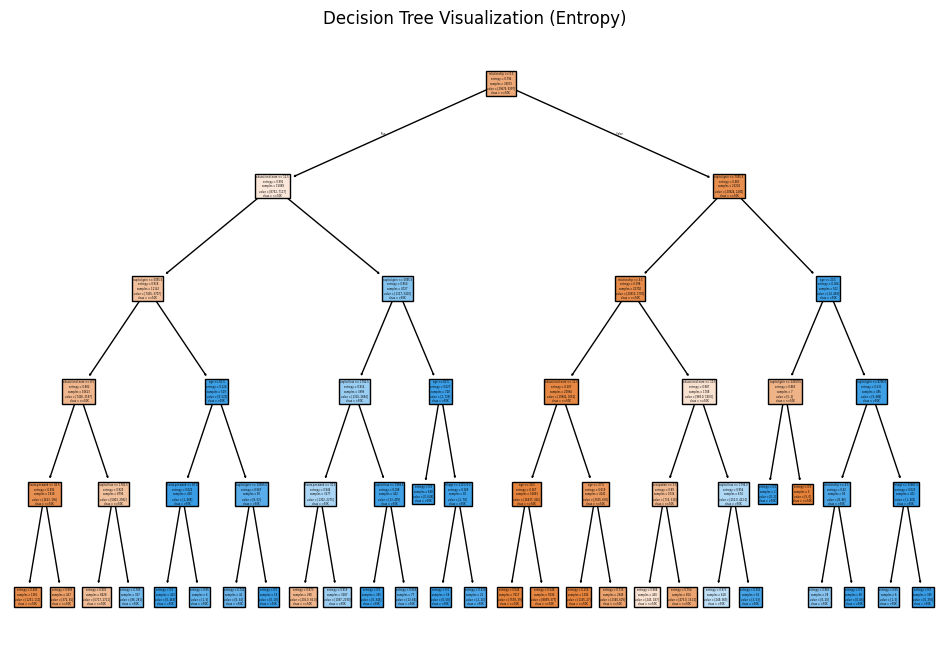

In [75]:
#e
# Mengatur ukuran figure untuk visualisasi Decision Tree.
plt.figure(figsize=(12, 8))
# Menggambar pohon keputusan dari model Decision Tree yang dilatih dengan nama fitur dan kelas spesies.
tree.plot_tree(dt_entropy, feature_names=X.columns, class_names=['<=50K','>50K'], filled=True)
# Menambahkan judul pada visualisasi Decision Tree.
plt.title("Decision Tree Visualization (Entropy)")
# Menampilkan visualisasi Decision Tree.
plt.show()

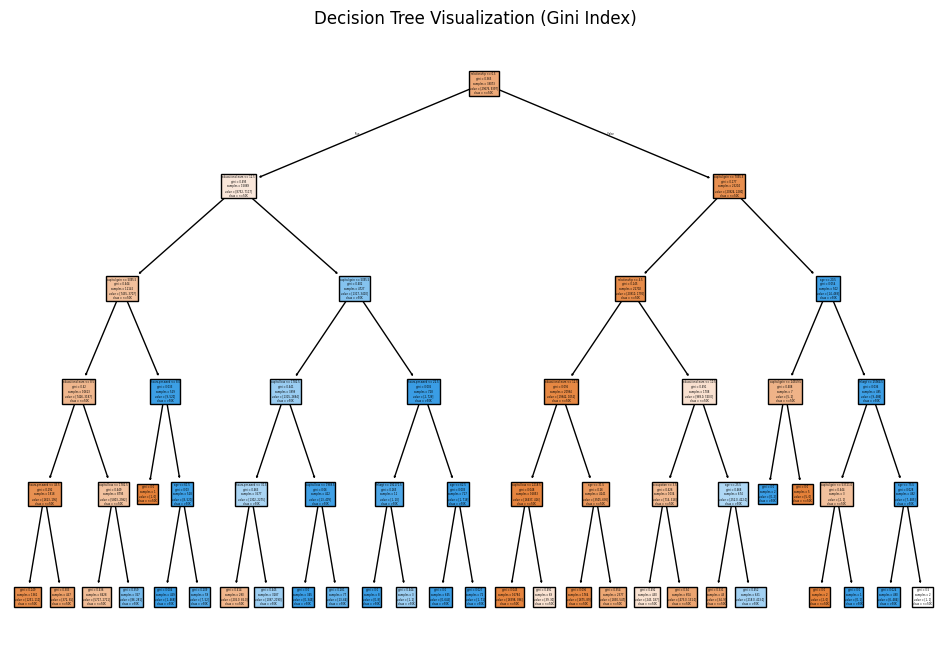

In [76]:
#e
# Mengatur ukuran figure untuk visualisasi Decision Tree.
plt.figure(figsize=(12, 8))
# Menggambar pohon dari model Decision Tree yang dilatih dengan nama fitur dan kelas spesies.
tree.plot_tree(dt_gini, feature_names=X.columns, class_names=['<=50K','>50K'], filled=True)
# Menambahkan judul pada visualisasi Decision Tree.
plt.title("Decision Tree Visualization (Gini Index)")
# Menampilkan visualisasi Decision Tree.
plt.show()

In [77]:
#f
# Menghitung matriks kebingungan untuk model dengan kriteria 'entropy' dengan membandingkan nilai prediksi (y_pred_entropy) dan nilai sebenarnya (y_test).
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
# Menghitung matriks kebingungan untuk model dengan kriteria 'gini' dengan membandingkan nilai prediksi (y_pred_gini) dan nilai sebenarnya (y_test).
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

# Menampilkan matriks kebingungan untuk model dengan kriteria 'entropy'.
print("Confusion Matrix Entropy:\n", conf_matrix_entropy)
# Menampilkan matriks kebingungan untuk model dengan kriteria 'gini'.
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

Confusion Matrix Entropy:
 [[7107  372]
 [1028 1262]]
Confusion Matrix Gini Index:
 [[7112  367]
 [1035 1255]]


In [78]:
#g
# Menghitung laporan klasifikasi untuk model dengan kriteria 'entropy' yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_entropy = classification_report(y_test, y_pred_entropy)
# Menghitung laporan klasifikasi untuk model dengan kriteria 'gini' yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_gini = classification_report(y_test, y_pred_gini)

# Menampilkan laporan klasifikasi untuk model dengan kriteria 'entropy'.
print("Classification Report Entropy:\n", class_report_entropy)
# Menampilkan laporan klasifikasi untuk model dengan kriteria 'gini'.
print("Classification Report Gini Index:\n", class_report_gini)

Classification Report Entropy:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7479
           1       0.77      0.55      0.64      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769

Classification Report Gini Index:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7479
           1       0.77      0.55      0.64      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



Gaussian Naive Bayes

In [79]:
#a
# Membuat model Gaussian Naive Bayes.
nb = GaussianNB()
# Melatih model menggunakan data pelatihan (X_train dan y_train).
nb.fit(X_train, y_train)

GaussianNB()

In [80]:
#b
# Menggunakan model Gaussian Naive Bayes yang dilatih untuk memprediksi kelas target ada set pengujian (X_test).
y_pred_nb = nb.predict(X_test)

In [81]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_nb) dengan nilai sebenarnya (y_test).
test_score_nb = accuracy_score(y_test, y_pred_nb)
# Menghitung skor akurasi untuk set pelatihan menggunakan model GaussianNB.
train_score_nb = nb.score(X_train, y_train)
# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_nb:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_nb:.4f}")

#d
# Menghitung matriks kebingungan untuk model Gaussian Naive Bayes dengan membandingkan nilai prediksi (y_pred_nb) dan nilai sebenarnya (y_test).
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
# Menampilkan matriks kebingungan untuk model Gaussian Naive Bayes.
print("Confusion Matrix:\n", conf_matrix_nb)

Training set score: 0.7936
Test set score: 0.7991
Confusion Matrix:
 [[7096  383]
 [1580  710]]


In [82]:
#e
# Menghitung laporan klasifikasi untuk model Gaussian Naive Bayes yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_nb = classification_report(y_test, y_pred_nb)
# Menampilkan laporan klasifikasi untuk model Gaussian Naive Bayes.
print("Classification Report:\n", class_report_nb)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



Random Forest

In [83]:
#a
# Membuat model Random Forest.
rf = RandomForestClassifier(n_estimators=100, random_state=0)
# Melatih model menggunakan data pelatihan (X_train dan y_train).
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [84]:
#b
# Menggunakan model Random Forest yang dilatih untuk memprediksi kelas target pada set pengujian (X_test).
y_pred_rf = rf.predict(X_test)

In [85]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_rf) dengan nilai sebenarnya (y_test).
test_score_rf = accuracy_score(y_test, y_pred_rf)
# Menghitung skor akurasi untuk set pelatihan menggunakan model Random Forest.
train_score_rf = rf.score(X_train, y_train)
# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_rf:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_rf:.4f}")

#d
# Menghitung matriks kebingungan untuk model Random Forest dengan membandingkan nilai prediksi (y_pred_rf) dan nilai sebenarnya (y_test).
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# Menampilkan matriks kebingungan untuk model Random Forest.
print("Confusion Matrix:\n", conf_matrix_rf)

Training set score: 0.9998
Test set score: 0.8628
Confusion Matrix:
 [[6971  508]
 [ 832 1458]]


In [86]:
#e
# Menghitung laporan klasifikasi untuk model Random Forest yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_rf = classification_report(y_test, y_pred_rf)
# Menampilkan laporan klasifikasi untuk model Random Forest.
print("Classification Report:\n", class_report_rf)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769

